# Applied Data Science Capstone Project (Coursera)
[Course link](https://www.coursera.org/learn/applied-data-science-capstone/home/welcome)

## Introduction
Bangalore is a very vibrant and multicultural city. There's probably a restaurant here representing every cuisine in the world. But getting around the city is a hassle. Traffic is another thing Bangalore is well known for.

To help promote tourism in the city, this project will utilize data from FourSquare and Zomato to formulate a tour of the city by using just the Metro Rail Services and a bit of walking. This project can be used by Tourism Boards to promote visiting Bangalore, which will have a very real impact on the city's income.

By aggregating various factors for each Metro station, we can rank them on the basis of:
1. Proximity to tourist places like Temples, Parks, Museums, etc.
2. Number of restaurants in the vicinity.
3. Diversity & Ratings of restaurants in the area.
4. Amount of walking to be done. :)


## Data
### Wikipedia

URL: 'https://en.wikipedia.org/wiki/List_of_Namma_Metro_stations'
This page contains a list of all functional metro stations in Bengaluru in a tabular format. The table also contains a link to each metro station's own wiki page.

URL: https://www.wikiwand.com/en/Majestic_metro_station
This is an example URL to one of the metro stations. The station specific pages have an info card which lists the exact location of the station in Lat/Long format. For example, `Majestic Metro Station's` coordinates are `12.975692°N 77.572836°E`. Lat/long obtained this way for each location will be used to query both Zomato & FourSquare to find venues near the metro stations.

### Zomato
Zomato is an Indian company that aggregates restaurant data. They have a data API that can be leveraged to obtain restaurants in an area given coordinates. This data will supplement FourSquare's data very well.
A detailed description of the API can be found at: https://developers.zomato.com/documentation#!/restaurant/search

Sample output from Zomato API for a restaurant
<code>
    {
   "restaurant":{
      "R":{
         "res_id":19304399,
         "is_grocery_store":false,
         "has_menu_status":{
            "delivery":-1,
            "takeaway":-1
         }
      },
      "apikey":"6ae125390c2cc1f1439b61445147ce52",
      "id":"19304399",
      "name":"Stoned Monkey",
      "url":"https://www.zomato.com/bangalore/stoned-monkey-vijay-nagar-bangalore?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1",
      "location":{
         "address":"22/1, Ground Floor, 3rd Main Road, Attiguppe, Chikkapete, Vijay Nagar, Bangalore",
         "locality":"Vijay Nagar",
         "city":"Bangalore",
         "city_id":4,
         "latitude":"12.9602338459",
         "longitude":"77.5323341042",
         "zipcode":"",
         "country_id":1,
         "locality_verbose":"Vijay Nagar, Bangalore"
      },
      "switch_to_order_menu":0,
      "cuisines":"Desserts, Ice Cream, Beverages",
      "timings":"12noon – 12midnight (Mon-Sun)",
      "average_cost_for_two":400,
      "price_range":1,
      "currency":"Rs.",
      "highlights":[
         "Cash",
         "Delivery",
         "Credit Card",
         "Takeaway Available",
         "Debit Card",
         "Indoor Seating",
         "Desserts and Bakes",
         "Air Conditioned",
         "Wifi"
      ],
      "offers":[         
      ],
      "opentable_support":0,
      "is_zomato_book_res":0,
      "mezzo_provider":"OTHER",
      "is_book_form_web_view":0,
      "book_form_web_view_url":"",
      "book_again_url":"",
      "thumb":"https://b.zmtcdn.com/data/pictures/2/17978352/5fc92af63722a09babd80a8d5253bf99.jpg?fit=around%7C200%3A200&crop=200%3A200%3B%2A%2C%2A",
      "user_rating":{
         "aggregate_rating":"3.6",
         "rating_text":"Good",
         "rating_color":"9ACD32",
         "rating_obj":{
            "title":{
               "text":"3.6"
            },
            "bg_color":{
               "type":"lime",
               "tint":"600"
            }
         },
         "votes":140
      },
      "all_reviews_count":1,
      "photos_url":"https://www.zomato.com/bangalore/stoned-monkey-vijay-nagar-bangalore/photos?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1#tabtop",
      "photo_count":160,
      "menu_url":"https://www.zomato.com/bangalore/stoned-monkey-vijay-nagar-bangalore/menu?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1&openSwipeBox=menu&showMinimal=1#tabtop",
      "featured_image":"https://b.zmtcdn.com/data/pictures/2/17978352/5fc92af63722a09babd80a8d5253bf99.jpg?output-format=webp",
      "has_online_delivery":1,
      "is_delivering_now":0,
      "store_type":"",
      "include_bogo_offers":true,
      "deeplink":"zomato://restaurant/19304399",
      "is_table_reservation_supported":0,
      "has_table_booking":0,
      "events_url":"https://www.zomato.com/bangalore/stoned-monkey-vijay-nagar-bangalore/events#tabtop?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1",
      "phone_numbers":"+91 9731780914",
      "all_reviews":{
         "reviews":[
            {
               "review":[]
            }
         ]
      },
      "establishment":[
         "Dessert Parlour"
      ],
      "establishment_types":[]
   }
}
    </code>

From Zomato, we can obtain a restaurant's
1. Exact address and lat/long for precise mapping
1. Cuisine type,
2. Ratings,
3. Popularity, etc.

We will be using the cuisine type (one-hot encoding) and ratings as features. This data will be aggregated for all restaurants around a Metro Station.

### Foursquare
We can also use FourSquare to find out if there are any interesting places to visit that are walkable from a Metro station.
Using foursquare, we obtain interesting places to visit such as
1. Museum,
2. Expos,
3. Theatres,
4. Shopping centres,
4. Parks, etc.

Sample output from FourSquare API for a venue
<code>
    {
       "reasons":{
          "count":0,
          "items":[
             {
                "summary":"This spot is popular",
                "type":"general",
                "reasonName":"globalInteractionReason"
             }
          ]
       },
       "venue":{
          "id":"52be91c8498e64525d5b46f0",
          "name":"KFC",
          "location":{
             "address":"No 96, next to HP petrol pump",
             "crossStreet":"Chandra layout",
             "lat":12.960916180639444,
             "lng":77.5281295778429,
             "labeledLatLngs":[
                {
                   "label":"display",
                   "lat":12.960916180639444,
                   "lng":77.5281295778429
                }
             ],
             "distance":602,
             "postalCode":"560040",
             "cc":"IN",
             "city":"Bangalore",
             "state":"Karnātaka",
             "country":"India",
             "formattedAddress":[
                "No 96, next to HP petrol pump (Chandra layout)",
                "Bangalore 560040",
                "Karnātaka",
                "India"
             ]
          },
          "categories":[
             {
                "id":"4d4ae6fc7a7b7dea34424761",
                "name":"Fried Chicken Joint",
                "pluralName":"Fried Chicken Joints",
                "shortName":"Fried Chicken",
                "icon":{
                   "prefix":"https://ss3.4sqi.net/img/categories_v2/food/friedchicken_",
                   "suffix":".png"
                },
                "primary":true
             }
          ],
          "photos":{
             "count":0,
             "groups":[]
          }
       },
       "referralId":"e-0-52be91c8498e64525d5b46f0-1"
    }
    </code>

As we can see above, we can get the following details about a venue from FourSquare:
1. Exact latitude/longitude for marking on maps.
2. Category of the location.



In [125]:
import requests
# !pip install beautifulsoup4
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

In [2]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_Namma_Metro_stations'
resp = requests.get(wiki_url)
soup = BeautifulSoup(resp.text)

station_info = []
for row in soup.select(".wikitable")[1].find_all('tr')[2:]:
    station_href = row.find_all('a')[0].get('href')
    station_name = row.find_all('a')[0].text
    if station_name == 'Green Line':
        # This entry is just an artifact of the way the table is constructed on wikipedia for this page.
        continue
    station_info.append({'station_name': station_name, 'station_href': station_href})
station_info

[{'station_name': 'Attiguppe',
  'station_href': '/wiki/Attiguppe_metro_station'},
 {'station_name': 'Baiyappanahalli',
  'station_href': '/wiki/Baiyappanahalli_metro_station'},
 {'station_name': 'Banashankari',
  'station_href': '/wiki/Banashankari_metro_station'},
 {'station_name': 'Bangalore City Railway Station',
  'station_href': '/wiki/Bangalore_City_Railway_station'},
 {'station_name': 'Chickpete',
  'station_href': '/wiki/Chickpete_metro_station'},
 {'station_name': 'Cubbon Park',
  'station_href': '/wiki/Cubbon_Park_metro_station'},
 {'station_name': 'Dasarahalli',
  'station_href': '/wiki/Dasarahalli_metro_station'},
 {'station_name': 'Deepanjali Nagar',
  'station_href': '/wiki/Deepanjali_Nagar_metro_station'},
 {'station_name': 'Halasuru', 'station_href': '/wiki/Halasuru_metro_station'},
 {'station_name': 'Hosahalli',
  'station_href': '/wiki/Hosahalli_metro_station'},
 {'station_name': 'Indiranagar',
  'station_href': '/wiki/Indiranagar_metro_station'},
 {'station_name': '

In [3]:
station_href_base = "https://en.wikipedia.org"
temp = []
s = requests.Session()
for station in station_info:
    url = station_href_base + station['station_href']
    print(url)
    resp = s.get(url)
    soup = BeautifulSoup(resp.text)
    try:
        station['station_coords'] = soup.select('.geo-dec')[0].text
        temp.append(station)
    except:
        print(station, 'did not have coordinates in Wikipedia. ')
station_info = temp
station_info

https://en.wikipedia.org/wiki/Attiguppe_metro_station
https://en.wikipedia.org/wiki/Baiyappanahalli_metro_station
https://en.wikipedia.org/wiki/Banashankari_metro_station
https://en.wikipedia.org/wiki/Bangalore_City_Railway_station
https://en.wikipedia.org/wiki/Chickpete_metro_station
https://en.wikipedia.org/wiki/Cubbon_Park_metro_station
https://en.wikipedia.org/wiki/Dasarahalli_metro_station
https://en.wikipedia.org/wiki/Deepanjali_Nagar_metro_station
https://en.wikipedia.org/wiki/Halasuru_metro_station
https://en.wikipedia.org/wiki/Hosahalli_metro_station
https://en.wikipedia.org/wiki/Indiranagar_metro_station
https://en.wikipedia.org/wiki/Jalahalli_metro_station
https://en.wikipedia.org/wiki/Jayanagar_metro_station
https://en.wikipedia.org/wiki/Jayaprakash_Nagar_metro_station
https://en.wikipedia.org/wiki/Krishna_Rajendra_Market_metro_station
https://en.wikipedia.org/wiki/Lalbagh_metro_station
https://en.wikipedia.org/wiki/Magadi_Road_metro_station
https://en.wikipedia.org/wiki/Ma

[{'station_name': 'Attiguppe',
  'station_href': '/wiki/Attiguppe_metro_station',
  'station_coords': '12.961957°N 77.533582°E'},
 {'station_name': 'Baiyappanahalli',
  'station_href': '/wiki/Baiyappanahalli_metro_station',
  'station_coords': '12.990763°N 77.652468°E'},
 {'station_name': 'Banashankari',
  'station_href': '/wiki/Banashankari_metro_station',
  'station_coords': '12.915649°N 77.573631°E'},
 {'station_name': 'Bangalore City Railway Station',
  'station_href': '/wiki/Bangalore_City_Railway_station',
  'station_coords': '12.97833°N 77.56944°E'},
 {'station_name': 'Chickpete',
  'station_href': '/wiki/Chickpete_metro_station',
  'station_coords': '12.966759°N 77.574782°E'},
 {'station_name': 'Cubbon Park',
  'station_href': '/wiki/Cubbon_Park_metro_station',
  'station_coords': '12.981095°N 77.596860°E'},
 {'station_name': 'Dasarahalli',
  'station_href': '/wiki/Dasarahalli_metro_station',
  'station_coords': '13.043567°N 77.512464°E'},
 {'station_name': 'Deepanjali Nagar',


In [67]:
radius = 1000
temp = []

s1 = requests.Session()
s2 = requests.Session()
for station in station_info:
    lat, lon = (i[:-2] for i in station['station_coords'].split())
    station['latitude'] = lat
    station['longitude'] = lon
    print(lat, lon)
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        FS_CLIENT_ID, 
        FS_CLIENT_SECRET, 
        FS_VERSION, 
        lat, 
        lon, 
        radius, 
        FS_LIMIT)
    results = s1.get(url, timeout=5).json()
    station['fs_results'] = results
    url = 'https://developers.zomato.com/api/v2.1/search?lat={}&lon={}&radius={}&sort=real_distance&order=asc'.format(
        lat,
        lon,
        radius
    )
    res = s2.get(url, headers=Z_HEADERS, timeout=5)
    station['zomato_results'] = res.json()
    temp.append(station)
station_info = temp


12.961957 77.533582
12.990763 77.652468
12.915649 77.573631
12.97833 77.56944
12.966759 77.574782
12.981095 77.596860
13.043567 77.512464
12.952187 77.536939
12.97566 77.62628
12.974178 77.545538
12.978558 77.638755
13.039491 77.519703
12.938237 77.580076
12.907299 77.573133
12.961353 77.574571
12.946355 77.580050
12.975578 77.555430
13.008217 77.548821
12.975692 77.572836
12.975536 77.606830
12.946507 77.529780
13.048041 77.500091
12.950548 77.573712
13.032921 77.533297
13.036341 77.525465
13.000334 77.549701
12.998456 77.556951
12.921458 77.580375
12.990508 77.570729
13.014707 77.553962
12.974104 77.584017
12.985958 77.644940
12.938237 77.580076
12.996508 77.563283
12.972953 77.617044
12.979823 77.592745
12.970801 77.537285
13.023181 77.549942
13.028370 77.540753


In [183]:
# dict_keys([
#'cuisines'
#'average_cost_for_two', 'price_range' 'user_rating', 'all_reviews_count'])
data_list = []
cuisines_all = []
for station in station_info:
    station_name = station['station_name']
    zom_results = station['zomato_results']
    cuisines = []
    total_rating, total_reviews, total_cost_for_two = 0, 0, 0
    for rests in zom_results['restaurants']:
        restaurant = rests['restaurant']
        total_cost_for_two += restaurant['average_cost_for_two']
        total_rating += float(restaurant['user_rating']['aggregate_rating']) * float(restaurant['all_reviews_count'])
        total_reviews += restaurant['all_reviews_count']
        cuisines.append(restaurant['cuisines'])
        
    cui_s = [i.strip() for i in ", ".join(cuisines).split(',')]
    cuisines_all.extend(cui_s)
    print(station_name, len(set(cui_s)))
    #print(cui_s)
    data_list.append({
        **{
            'name': station_name,
            'average_rating': total_rating/total_reviews,
            'cost_for_two': total_cost_for_two/len(zom_results['restaurants']),
            'latitude': station['latitude'],
            'longitude': station['longitude']
        },
        **{k:v/len(cui_s) for k,v in Counter(cui_s).items()}})
        
metros = pd.DataFrame(data_list).fillna(0)
print(Counter(cuisines_all).most_common(10))
metros

Attiguppe 16
Baiyappanahalli 16
Banashankari 14
Bangalore City Railway Station 16
Chickpete 15
Cubbon Park 26
Dasarahalli 15
Deepanjali Nagar 17
Halasuru 13
Hosahalli 17
Indiranagar 21
Jalahalli 19
Jayanagar 19
Jayaprakash Nagar 19
Krishna Rajendra Market 13
Lalbagh 16
Magadi Road 19
Mahalakshmi 19
Majestic 16
Mahatma Gandhi Road 26
Mysore Road 14
Nagasandra 14
National College 18
Peenya 21
Peenya Industry 18
Rajajinagar 14
Rashtrakavi Kuvempu Road 13
Rashtreeya Vidyalaya Road 23
Sampige Road 26
Sandal Soap Factory 26
Sir M. Visveshwarya 17
Swami Vivekananda Road 16
South End Circle 19
Srirampura 15
Trinity 27
Dr. B. R. Ambedkar Station, Vidhana Soudha 23
Vijayanagar 14
Yeshwantpur 23
Goraguntepalya 21
[('North Indian', 284), ('Chinese', 211), ('South Indian', 207), ('Fast Food', 200), ('Beverages', 157), ('Desserts', 110), ('Biryani', 99), ('Street Food', 74), ('Ice Cream', 59), ('Continental', 44)]


,name,average_rating,cost_for_two,latitude,longitude,Desserts,Ice Cream,Beverages,South Indian,North Indian,...,Japanese,Modern Indian,Sushi,Afghan,BBQ,Charcoal Chicken,European,Tex-Mex,Rajasthani,Wraps
0,Attiguppe,3.922222,292.5,12.961957,77.533582,0.081633,0.102041,0.163265,0.122449,0.081633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Baiyappanahalli,2.924865,357.5,12.990763,77.652468,0.043478,0.065217,0.086957,0.065217,0.173913,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Banashankari,4.342857,315.0,12.915649,77.573631,0.170732,0.073171,0.073171,0.146341,0.073171,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bangalore City Railway Station,3.321637,517.5,12.97833,77.56944,0.019608,0.019608,0.078431,0.176471,0.235294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Chickpete,3.872932,307.5,12.966759,77.574782,0.000000,0.052632,0.105263,0.210526,0.184211,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Cubbon Park,3.469369,625.0,12.981095,77.596860,0.046154,0.015385,0.046154,0.138462,0.153846,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Dasarahalli,3.749115,362.5,13.043567,77.512464,0.023256,0.000000,0.023256,0.232558,0.139535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Deepanjali Nagar,3.749011,375.0,12.952187,77.536939,0.042553,0.021277,0.042553,0.127660,0.212766,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Halasuru,3.570294,270.0,12.97566,77.62628,0.023256,0.000000,0.046512,0.116279,0.255814,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Hosahalli,3.996667,317.5,12.974178,77.545538,0.078431,0.058824,0.137255,0.137255,0.098039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [167]:
metros_for_clustering = metros.drop(['name', 'latitude', 'longitude'], 1)
scaler = MinMaxScaler()
metros_for_clustering = pd.DataFrame(scaler.fit_transform(metros_for_clustering), columns=metros_for_clustering.columns)

In [200]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(metros_for_clustering)
metros_clustered_km = metros.copy()
metros_clustered_km.insert(0, 'Cluster labels', kmeans.labels_)
metros_clustered_km[['name', 'Cluster labels']]

,name,Cluster labels
0,Attiguppe,3
1,Baiyappanahalli,1
2,Banashankari,3
3,Bangalore City Railway Station,1
4,Chickpete,0
5,Cubbon Park,1
6,Dasarahalli,1
7,Deepanjali Nagar,1
8,Halasuru,1
9,Hosahalli,3


In [201]:
lat = 12.9716
lon = 77.5946

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_blr = folium.Map(location=[lat, lon], zoom_start=12)
# for station in data_list:
for name, lat, lon, cluster, rating in zip(metros_clustered_km['name'], metros_clustered_km['latitude'], metros_clustered_km['longitude'], metros_clustered_km['Cluster labels'], metros_clustered_km['average_rating']):
    label = '{} ({:.2})'.format(name, rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_blr) 
    
map_blr

In [173]:
lat = 12.9716
lon = 77.5946

colors_array = cm.viridis(np.linspace(0, 1))

rainbow = {rt: colors.rgb2hex(i) for i, rt in zip(colors_array, sorted(metros_clustered_km['average_rating']))}
map_blr = folium.Map(location=[lat, lon], zoom_start=12)
# for station in data_list:
for name, lat, lon, rating in zip(metros_clustered_km['name'], metros_clustered_km['latitude'], metros_clustered_km['longitude'],metros_clustered_km['average_rating']):
    label = '{} ({:.2})'.format(name, rating)
    label = folium.Popup(label, parse_html=True)
    # print(name, label, rainbow[rating])
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[rating],
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_blr)
map_blr.save('ratings.html')
map_blr

In [194]:
lat = 12.9716
lon = 77.5946

colors_array = cm.seismic(np.linspace(0, 1, 1200))
print(min(metros_clustered_km['cost_for_two']), max(metros_clustered_km['cost_for_two']))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# rainbow = {rt: colors.rgb2hex(i) for i, rt in zip(colors_array, sorted(metros_clustered_km['cost_for_two']))}
map_blr = folium.Map(location=[lat, lon], zoom_start=12)
# for station in data_list:
for name, lat, lon, cost_for_two in zip(metros_clustered_km['name'], metros_clustered_km['latitude'], metros_clustered_km['longitude'],metros_clustered_km['cost_for_two']):
    label = '{} ({})'.format(name, cost_for_two)
    label = folium.Popup(label, parse_html=True)
    # print(name, label, rainbow[rating])
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[int(cost_for_two)],
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_blr)
map_blr

270.0 1147.5


In [190]:
metros_clustered_km.sort_values('average_rating')

,Cluster labels,name,average_rating,cost_for_two,latitude,longitude,Desserts,Ice Cream,Beverages,South Indian,...,Japanese,Modern Indian,Sushi,Afghan,BBQ,Charcoal Chicken,European,Tex-Mex,Rajasthani,Wraps
1,1,Baiyappanahalli,2.924865,357.5,12.990763,77.652468,0.043478,0.065217,0.086957,0.065217,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,Bangalore City Railway Station,3.321637,517.5,12.97833,77.56944,0.019608,0.019608,0.078431,0.176471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0,Krishna Rajendra Market,3.453211,307.5,12.961353,77.574571,0.000000,0.025000,0.025000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,1,"Dr. B. R. Ambedkar Station, Vidhana Soudha",3.460952,882.5,12.979823,77.592745,0.079365,0.015873,0.047619,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1,Cubbon Park,3.469369,625.0,12.981095,77.596860,0.046154,0.015385,0.046154,0.138462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,1,Indiranagar,3.487589,502.5,12.978558,77.638755,0.052632,0.017544,0.105263,0.070175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,Halasuru,3.570294,270.0,12.97566,77.62628,0.023256,0.000000,0.046512,0.116279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21,1,Nagasandra,3.610857,302.5,13.048041,77.500091,0.021277,0.000000,0.021277,0.170213,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,1,Majestic,3.682182,417.5,12.975692,77.572836,0.063492,0.015873,0.079365,0.126984,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,Deepanjali Nagar,3.749011,375.0,12.952187,77.536939,0.042553,0.021277,0.042553,0.127660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [191]:
metros_clustered_km.sort_values('cost_for_two')

,Cluster labels,name,average_rating,cost_for_two,latitude,longitude,Desserts,Ice Cream,Beverages,South Indian,...,Japanese,Modern Indian,Sushi,Afghan,BBQ,Charcoal Chicken,European,Tex-Mex,Rajasthani,Wraps
8,1,Halasuru,3.570294,270.0,12.97566,77.62628,0.023256,0.000000,0.046512,0.116279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,3,National College,4.022576,285.0,12.950548,77.573712,0.111111,0.022222,0.111111,0.022222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,3,Attiguppe,3.922222,292.5,12.961957,77.533582,0.081633,0.102041,0.163265,0.122449,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,1,Srirampura,3.978169,302.5,12.996508,77.563283,0.000000,0.019608,0.078431,0.117647,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21,1,Nagasandra,3.610857,302.5,13.048041,77.500091,0.021277,0.000000,0.021277,0.170213,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,1,Jayaprakash Nagar,3.799793,305.5,12.907299,77.573133,0.042553,0.021277,0.042553,0.212766,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,Chickpete,3.872932,307.5,12.966759,77.574782,0.000000,0.052632,0.105263,0.210526,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0,Krishna Rajendra Market,3.453211,307.5,12.961353,77.574571,0.000000,0.025000,0.025000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,Banashankari,4.342857,315.0,12.915649,77.573631,0.170732,0.073171,0.073171,0.146341,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,3,Hosahalli,3.996667,317.5,12.974178,77.545538,0.078431,0.058824,0.137255,0.137255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='average_rating', ylabel='cost_for_two'>

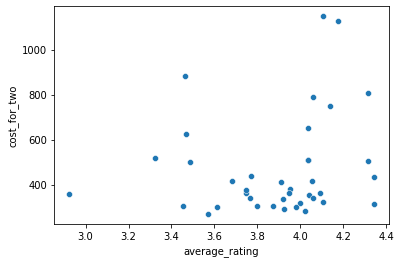

In [193]:
sns.scatterplot(x=metros_clustered_km['average_rating'], y = metros_clustered_km['cost_for_two'])